In [199]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [200]:
'''
    import the dataset
'''
from tensorflow.keras import datasets as ds

(x, y), (x_, y_) = ds.fashion_mnist.load_data()
assert x.shape == (60000, 28, 28)
assert y.shape == (60000,)
assert x_.shape == (10000, 28, 28)
assert y_.shape == (10000,)


In [201]:
'''
    split the dataset

    parameters:
        total: the total number of photo in train datesets
        H: the length of the photo size
        W: the width of the photo size
'''
total, L, W = x.shape[0:3]
assert total == 60000
assert L == 28
assert W == 28
assert type(total) == int

# the proportion of the validation set is 20%
valid_split = 0.2

train_num = int(total*(1 - valid_split))
assert train_num == 48000

train_x = x[ :train_num]
train_y = y[ :train_num]
assert train_x.shape == (48000,28,28)
assert type(train_x.shape) == tuple

valid_x = x[train_num: ]
valid_y = y[train_num: ]

test_x = x_
test_y = y_

(28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

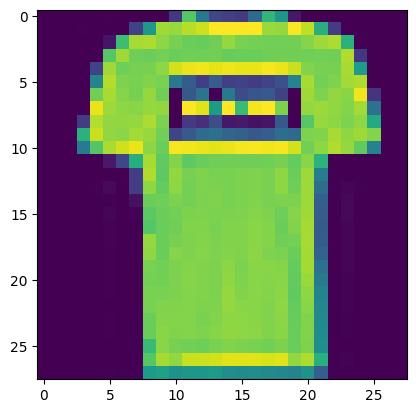

In [202]:
'''
    show the photo
'''
x1 = train_x[1,:]
print(x1.shape)
x1 = x1.reshape(28,28)

plt.figure()
plt.imshow(x1)
plt.show

In [203]:
'''
    reshape the date
'''
train_x = train_x.reshape(-1, L*W)
valid_x = valid_x.reshape(-1, L*W)
test_x = test_x.reshape(-1, L*W)

assert len(train_x[:]) == 48000
assert len(train_x[0]) == 784
assert train_x.shape == (48000, 784)


In [204]:
'''
    normalize the data
'''
train_x = tf.cast(train_x/255.0, tf.float32)
valid_x = tf.cast(valid_x/255.0, tf.float32)
test_x = tf.cast(test_x/255.0, tf.float32)

In [205]:
'''
    one-hot encoding
'''
class_num = len(np.unique(y))

train_y = tf.one_hot(train_y, class_num)
valid_y = tf.one_hot(valid_y, class_num)
test_y = tf.one_hot(test_y, class_num)

In [206]:
'''
    construct neural network model
'''
def model(x, w, b):
    pred = tf.matmul(x, w) + b
    return tf.nn.softmax(pred)

In [207]:
'''
    define loss function
'''
def loss(x, y, w, b):
    pred = model(x, w, b)
    loss_ = tf.keras.losses.categorical_crossentropy(y_true=y, y_pred=pred)
    return tf.reduce_mean(loss_)

In [208]:
'''
    compute the gradient
'''
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w,b])

In [209]:
def accuracy(x, y, w, b):
    pred = model(x, w, b)
    corrections = tf.equal(tf.argmax(pred, axis=-1), tf.argmax(y, axis=-1))
    return tf.reduce_mean(tf.cast(corrections, tf.float32))

In [210]:
# define hyperparameters
epochs = 30
batch_size = 100
lr = 0.00175

In [211]:
# define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

In [212]:
# get the steps in each epoch
steps = train_num // batch_size

In [213]:
train_losses = []
valid_losses = []
train_accuracys = []
valid_accuracys = []

In [214]:
W = tf.Variable(tf.random.normal([L*W, class_num], mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros([class_num], dtype=tf.float32))

In [215]:
print(W.shape)
print(B.shape)

(784, 10)
(10,)


In [216]:
print(W)
print(B)

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
array([[ 2.129607  ,  1.2244457 , -0.3741863 , ..., -0.8335819 ,
         1.4544135 ,  3.0027971 ],
       [ 1.3475364 ,  0.30354634, -0.63355976, ..., -0.16764912,
        -0.19912475,  2.7746017 ],
       [ 1.3446696 , -0.70539093, -0.3138866 , ...,  1.029569  ,
        -0.6293746 ,  0.14554453],
       ...,
       [ 0.46949315,  0.7490494 ,  0.8864503 , ..., -0.0538325 ,
         1.2986517 ,  1.0874084 ],
       [-0.2685384 ,  2.0316432 ,  0.84527296, ..., -0.87566686,
         1.0150014 ,  0.32194415],
       [ 0.08361822, -1.6871316 , -1.2662356 , ..., -0.0153454 ,
         0.10609037, -0.9884619 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>


In [217]:
'''
    training process
'''
for epoch in range(epochs):
    for step in range(steps):
        xs = train_x[step*batch_size: (step+1)*batch_size]
        ys = train_y[step*batch_size: (step+1)*batch_size]

        grads = grad(xs, ys, W, B)
        optimizer.apply_gradients(zip(grads, [W, B]))

    train_loss = loss(train_x, train_y, W, B).numpy()
    valid_loss = loss(valid_x, valid_y, W, B).numpy()
    train_accuracy = accuracy(train_x, train_y, W, B).numpy()
    valid_accuracy = accuracy(valid_x, valid_y, W, B).numpy()

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accuracys.append(train_accuracy)
    valid_accuracys.append(valid_accuracy)

    print('epoch={:3d}, train_loss={:4f}, train_acc={:4f}, valid_loss={:4f}, valid_acc={:4f}'.format(epoch+1, train_loss, train_accuracy, valid_loss, valid_accuracy))

test_accuracy = accuracy(test_x, test_y, W, B).numpy()
print('test accuracy:{:4f}'.format(test_accuracy) )


epoch=  1, train_loss=1.732888, train_acc=0.657021, valid_loss=1.691906, valid_acc=0.658750
epoch=  2, train_loss=1.294838, train_acc=0.721917, valid_loss=1.273273, valid_acc=0.721250
epoch=  3, train_loss=1.085018, train_acc=0.751917, valid_loss=1.082851, valid_acc=0.751333
epoch=  4, train_loss=0.960613, train_acc=0.769562, valid_loss=0.970820, valid_acc=0.768833
epoch=  5, train_loss=0.874434, train_acc=0.784292, valid_loss=0.894230, valid_acc=0.781833
epoch=  6, train_loss=0.811893, train_acc=0.793917, valid_loss=0.840364, valid_acc=0.790500
epoch=  7, train_loss=0.763957, train_acc=0.801458, valid_loss=0.799438, valid_acc=0.797250
epoch=  8, train_loss=0.726179, train_acc=0.806875, valid_loss=0.767773, valid_acc=0.802083
epoch=  9, train_loss=0.695353, train_acc=0.812333, valid_loss=0.741157, valid_acc=0.804833
epoch= 10, train_loss=0.669243, train_acc=0.816479, valid_loss=0.718905, valid_acc=0.808250
epoch= 11, train_loss=0.646851, train_acc=0.820229, valid_loss=0.699771, valid_a

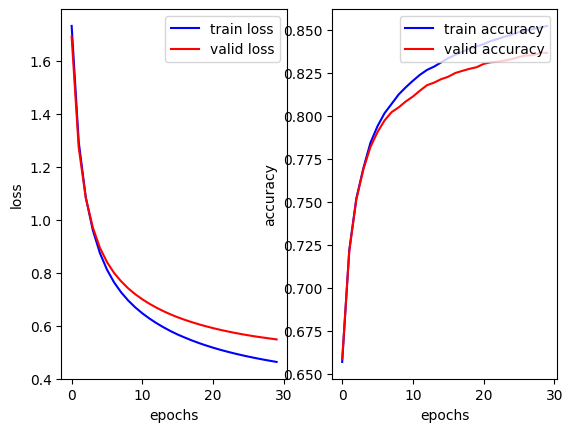

In [218]:
plt.subplot(1,2,1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(train_losses, 'blue', label='train loss')
plt.plot(valid_losses, 'red', label='valid loss')
plt.legend(loc=1)

plt.subplot(1,2,2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(train_accuracys, 'blue', label='train accuracy')
plt.plot(valid_accuracys, 'red', label='valid accuracy')
plt.legend(loc=1)

plt.show()